In [52]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Create images

The images used in this tutorial are generated using the formula:

- Red channel: draw samples from univariate distribition [0, 255]
- Blue channel: draw samples from univariate distribution [0, 255]
- Green channel: if image belongs to class 0, draw samples from univariate distribution [0,150]. Else: draw from univariate distribution [105, 255]

In [78]:
def createImage(_class):
    red = np.random.randint(low=0,high=256, size=32*32).reshape(32,32,1)
    blue = np.random.randint(low=0,high=256, size=32*32).reshape(32,32,1)
    
    if _class == 0:
        green = np.random.randint(low=0, high=151, size=32*32).reshape(32,32,1)
    else:
        green = np.random.randint(low=105, high=256, size=32*32).reshape(32,32,1)
        
    image = np.concatenate([red, green, blue], axis=2)
    return image
    

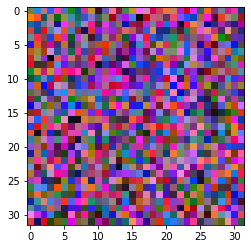

In [79]:
img = createImage(0)
plt.imshow(img)
plt.show()

In [12]:
Y = np.concatenate([np.zeros(50), np.ones(50)])
X = np.concatenate([np.expand_dims(createImage(y), 0) for y in Y])

### Convert image into the histogram

In [87]:
def histogram(x, channel, bins=30):
    data_from_channel = x[...,channel].reshape(-1)
    histogram, ranges = np.histogram(data_from_channel, bins=bins, range=(0,255))
    
    return histogram, ranges

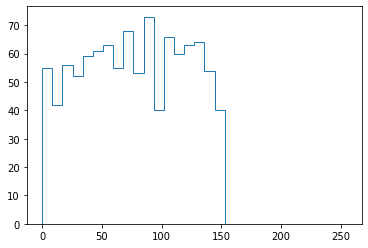

In [88]:
hist, ranges = histogram(X[0], channel=1, bins=30)
plt.stairs(hist, ranges)
plt.show()

### Prepare dataset

In [89]:
def getDataset(channel):
    hist_list = [histogram(X[i], channel)[0] for i in range(X.shape[0])]
    Xhists = np.concatenate([np.expand_dims(h, 0) for h in hist_list])
    xtrain, xtest, ytrain, ytest = train_test_split(Xhists, Y)
    
    return xtrain, xtest, ytrain, ytest

In [90]:
channel = 2

xtrain, xtest, ytrain, ytest = getDataset(channel)
model = xgboost.XGBClassifier()

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

accuracy = accuracy_score(ytest, pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.6


### Average histogram per class and channel

Text(0.5, 1.0, 'Average histogram of blue channel for class 1')

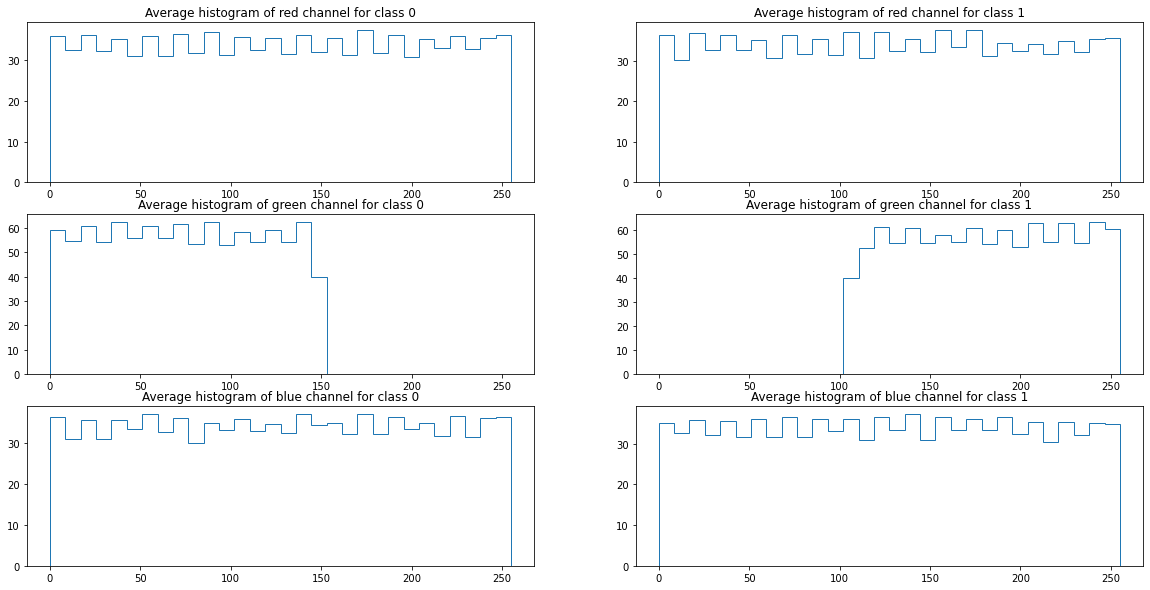

In [100]:
def getAverageHistogramPerClass(channel):
    xtrain, xtest, ytrain, ytest = getDataset(channel)
    
    x0 = xtrain[ytrain == 0]
    x0mean = x0.mean(axis=0)
    
    x1 = xtrain[ytrain == 1]
    x1mean = x1.mean(axis=0)
    
    return x0mean, x1mean

fig, axs = plt.subplots(3,2, figsize=(20,10))

channel_red_class0, channel_red_class1 = getAverageHistogramPerClass(0)
axs[0,0].stairs(channel_red_class0, ranges)
axs[0,0].set_title("Average histogram of red channel for class 0")

axs[0,1].stairs(channel_red_class1, ranges)
axs[0,1].set_title("Average histogram of red channel for class 1")

channel_green_class0, channel_green_class1 = getAverageHistogramPerClass(1)
axs[1,0].stairs(channel_green_class0, ranges)
axs[1,0].set_title("Average histogram of green channel for class 0")

axs[1,1].stairs(channel_green_class1, ranges)
axs[1,1].set_title("Average histogram of green channel for class 1")

channel_blue_class0, channel_blue_class1 = getAverageHistogramPerClass(2)
axs[2,0].stairs(channel_blue_class0, ranges)
axs[2,0].set_title("Average histogram of blue channel for class 0")

axs[2,1].stairs(channel_blue_class1, ranges)
axs[2,1].set_title("Average histogram of blue channel for class 1")